
# Network Models: BA networks and the Configuration Model

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.
Universidade de São Paulo, São Carlos, Brasil.
https://sites.icmc.usp.br/francisco
Copyright: Creative Commons


In [1]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Barabási-Albert model

To generate a Barabási-Albert network, we use the command nx.barabasi_albert_graph.

In [2]:
N = 1000 
av_degree = 8
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)

The number of nodes and edges.

In [3]:
N = len(GBA)
M = GBA.number_of_edges()
print('Number of nodes: ', N)
print('Number of edges: ', M)
print('Average degree: ', 2*M/N)

Number of nodes:  1000
Number of edges:  3984
Average degree:  7.968


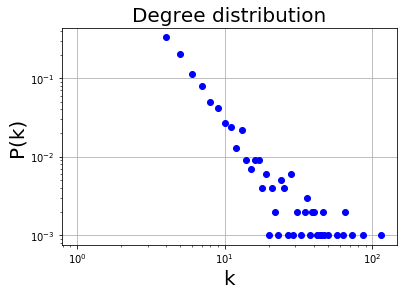

In [4]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues = arange(0, maxk+1)
    Pk = np.zeros(maxk+1)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk)
    return kvalues, Pk

ks, Pk = degree_distribution(GBA)

plt.figure()
plt.loglog(ks, Pk, 'bo', basex = 10, basey = 10)
plt.xlabel('k', fontsize = 20)
plt.ylabel('P(k)', fontsize = 20)
plt.title('Degree distribution', fontsize = 20)
plt.grid(True)
plt.savefig('degree_dist.eps')
plt.show(True)

In [5]:
M = np.column_stack((ks, Pk))
np.savetxt('BA_distribution.txt', M, delimiter = '\t')

## Configuration model

The configuration model produces random networks with a given degree sequence. Let us consider the Zipf function to define the degree distribution: p(x)≈x−a
. It is possible to consider a Poisson distribution too (see the comments in the code).

/home/aime/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


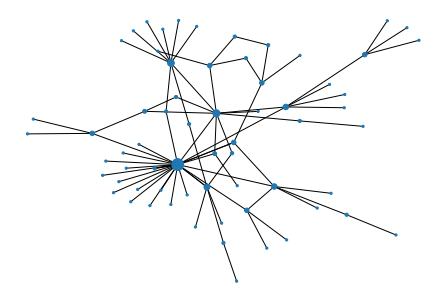

In [6]:
from random import *
N = 100
a = 2.5
seq = np.random.zipf(a, N) #Zipf distribution
#seq = np.random.poisson(10, N) #Poisson distribution
#print(seq)
if(sum(seq)%2 != 0): # the sum of stubs have to be even
    pos = randint(0, len(seq))
    seq[pos] = seq[pos]+ 1
#print(sum(seq))
GCM=nx.configuration_model(seq)
#get the largest component
Gcc=sorted(nx.connected_component_subgraphs(GCM), key = len, reverse=True)
G=Gcc[0]
d = dict(G.degree())
nx.draw(G, nodelist=d.keys(), node_size=[v * 5 for v in d.values()])
plt.show()

The number of nodes and edges.

In [7]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)
print('Average degre:', 2*M/N)

Number of nodes: 65
Number of edges: 79
Average degre: 2.4307692307692306


The degree distribution of the obtained network.

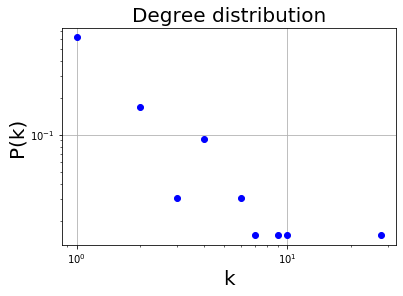

In [8]:
ks, Pk = degree_distribution(G)

plt.figure()
plt.loglog(ks,Pk,'bo',basex=10,basey=10)
#plt.plot(ks,Pk,'bo')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file
plt.show(True)

In [9]:
M = np.column_stack((ks, Pk))
np.savetxt('CM_distribution.txt', M, delimiter = '\t')